In [125]:
#importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [126]:
#importing the dataset and extracting the independent and dependent variables
sea_ice_train = pd.read_csv('/home/abokye/Desktop/ai/data-sea-ice/DRIFT_DATA_TRAIN.csv')
sea_ice_test = pd.read_csv('/home/abokye/Desktop/ai/data-sea-ice/DRIFT_DATA_TEST.csv')

In [127]:
# display the content of DRIFT DATA TRAIN
sea_ice_train.head()

,year,month,day,doy,x_EASE,y_EASE,u_buoy,v_buoy,id_buoy,u_ERA5,v_ERA5,sic_CDR,h_cs2smos,h_piomas,d2c
0,1979,2,18,49,147.506958,138.582672,-0.797554,1.114740,1906,-6.704156,-0.321260,0.990195,NaN,3.189743,522.523298
1,1979,2,18,49,146.834778,120.509880,0.643200,0.368754,1913,-6.818630,-0.674205,0.966372,NaN,2.484009,412.767669
2,1979,2,18,49,130.993561,129.623672,-1.162420,0.243717,1914,-8.825469,1.123955,0.996022,NaN,2.474106,362.547379
3,1979,2,18,49,147.524719,157.382492,0.919766,0.025784,1918,-1.079951,-1.035410,0.982681,NaN,3.740522,381.025629
4,1979,2,19,50,147.470963,138.599823,0.380940,1.243485,1906,-2.169171,2.537787,0.990302,NaN,3.188522,521.535334


In [128]:
# display the content of DRIFT DATA TEST
sea_ice_test.head()

,year,month,day,doy,x_EASE,y_EASE,u_buoy,v_buoy,id_buoy,u_ERA5,v_ERA5,sic_CDR,h_cs2smos,h_piomas,d2c
0,1979,2,18,49,197.656311,204.507797,NaN,NaN,NaN,5.998414,3.617303,0.987723,NaN,2.535649,375.766965
1,1979,2,19,50,197.769897,204.840912,NaN,NaN,NaN,-1.414826,-0.201038,0.964051,NaN,2.539519,370.636136
2,1979,2,19,50,147.548553,157.382889,NaN,NaN,NaN,-4.140861,3.038851,1.000000,NaN,3.746467,381.590523
3,1979,2,20,51,146.934814,120.546783,NaN,NaN,NaN,2.998362,4.055094,1.000000,NaN,2.496566,413.672796
4,1979,2,21,52,197.534439,204.845886,NaN,NaN,NaN,-8.538108,4.243983,0.978987,NaN,2.530706,376.255493


In [129]:
x = sea_ice_train.iloc[:, :-1].values
y = sea_ice_train.iloc[:, 13].values

<AxesSubplot:>

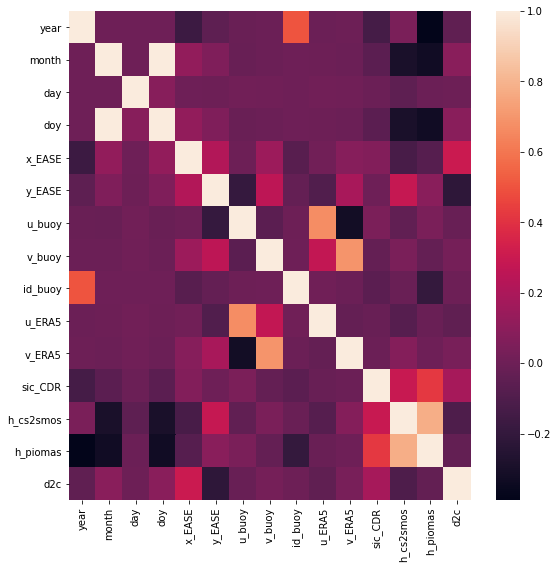

In [130]:
#Data Visualization of DRIFT DATA TRAIN
#Building the Correlation matrix
f, ax = plt.subplots(1, figsize=(9, 9))
sns.heatmap(sea_ice_train.corr())

In [131]:
x = sea_ice_test.iloc[:, :-1].values
y = sea_ice_test.iloc[:, 8:10].values

<AxesSubplot:>

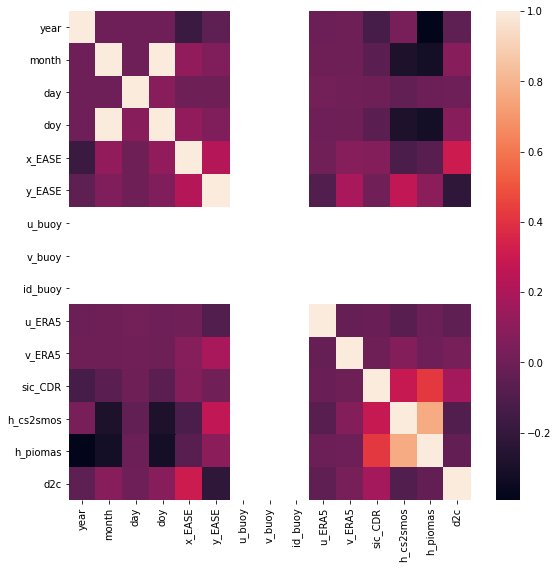

In [132]:
#Data Visualization of DRIFT DATA TEST
#Building the Correlation matrix
f, ax = plt.subplots(1, figsize=(9, 9))
sns.heatmap(sea_ice_test.corr())

In [133]:
# Splitting the dataset into the Training set and Validation set
sea_ice_no_miss=sea_ice_train.fillna(0)
x = sea_ice_no_miss.iloc[:, :-1].values
y = sea_ice_no_miss.iloc[:, 13].values
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [134]:
sea_ice_no_miss.head()

,year,month,day,doy,x_EASE,y_EASE,u_buoy,v_buoy,id_buoy,u_ERA5,v_ERA5,sic_CDR,h_cs2smos,h_piomas,d2c
0,1979,2,18,49,147.506958,138.582672,-0.797554,1.114740,1906,-6.704156,-0.321260,0.990195,0.0,3.189743,522.523298
1,1979,2,18,49,146.834778,120.509880,0.643200,0.368754,1913,-6.818630,-0.674205,0.966372,0.0,2.484009,412.767669
2,1979,2,18,49,130.993561,129.623672,-1.162420,0.243717,1914,-8.825469,1.123955,0.996022,0.0,2.474106,362.547379
3,1979,2,18,49,147.524719,157.382492,0.919766,0.025784,1918,-1.079951,-1.035410,0.982681,0.0,3.740522,381.025629
4,1979,2,19,50,147.470963,138.599823,0.380940,1.243485,1906,-2.169171,2.537787,0.990302,0.0,3.188522,521.535334


In [135]:
#del sea_ice_train['h_cs2smos']
#sea_ice_train = sea_ice_train.reset_index()

In [136]:
# Fitting Multiple Linear Regression to the Training Set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [137]:
# Predicting the Test set results
y_pred = regressor.predict(x_val)
print(y_pred)

[0.78150107 2.29880977 2.351999   ... 2.70437391 2.46614333 1.3540367 ]


In [138]:
# Calculating the Coefficients
print(regressor.coef_)

[ 3.50024011e-17  2.66732565e-14  1.16621876e-15 -8.85109029e-16
  6.73777732e-17 -2.18415641e-17 -6.56569836e-17  5.63053363e-17
 -5.52517148e-19 -2.55363121e-17 -1.28980550e-16 -3.02000955e-15
  3.52781833e-16  1.00000000e+00]


In [139]:
# Calculating the R squared value
from sklearn.metrics import r2_score
r2_score(y_val, y_pred)

1.0

# r2_score of 1.0 means the model is very accurate

In [123]:
from sklearn.metrics import mean_squared_error

ms = mean_squared_error(y_val, y_pred, squared=False)

print (ms)

1.952419846274112e-14


In [124]:
import math
RMSE = math.sqrt(ms)
print("Root Mean Square Error:\n")
print(RMSE)

Root Mean Square Error:

1.3972901796957252e-07


# Root Mean Square Error of 1.3972901796957252e-07 is very small confirming the accuracy of the regression model

# Ui = y_pred and Vi = y_val

# MERCI BEAUCOUP!!!!